<a href="https://colab.research.google.com/github/vincentjunitio00/Flower-Classification-from-scratch/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/vincentjunitio00/Flower-Classification-from-scratch"

Cloning into 'Flower-Classification-from-scratch'...
remote: Enumerating objects: 2576, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2576 (delta 0), reused 17 (delta 0), pack-reused 2559
Receiving objects: 100% (2576/2576), 132.90 MiB | 41.39 MiB/s, done.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
home = '/content/Flower-Classification-from-scratch/'

training_path = os.path.join(home, 'training/')
testing_path = os.path.join(home, 'testing/')

labels = os.listdir(training_path)

In [5]:
def create_processed_folder(labels):
  content = '/content/'
  processed_path = os.path.join(content, 'processed/')
  os.mkdir(processed_path)

  processed_training_path = os.path.join(processed_path, 'training/')
  os.mkdir(processed_training_path)

  processed_testing_path = os.path.join(processed_path, 'testing/')
  os.mkdir(processed_testing_path)

  path = {}
  
  for label in labels:
    training_name = str(label)+'_processed_training_path'
    training_name_path = os.path.join(processed_training_path, str(label)+'/')
    os.mkdir(training_name_path)

    testing_name = str(label)+'_processed_testing_path'
    testing_name_path = os.path.join(processed_testing_path, str(label)+'/')
    os.mkdir(testing_name_path)

    path[training_name] = training_name_path
    path[testing_name] = testing_name_path

  path["training_path"] = processed_training_path
  path["testing_path"] = processed_testing_path

  print("Warning! You can only run this function once in the same runtime!")
  return path

In [6]:
processed_path = create_processed_folder(labels)

Warning! You can only run this function once in the same runtime!


In [7]:
processed_path

{'daisy_processed_testing_path': '/content/processed/testing/daisy/',
 'daisy_processed_training_path': '/content/processed/training/daisy/',
 'dandelion_processed_testing_path': '/content/processed/testing/dandelion/',
 'dandelion_processed_training_path': '/content/processed/training/dandelion/',
 'sunflower_processed_testing_path': '/content/processed/testing/sunflower/',
 'sunflower_processed_training_path': '/content/processed/training/sunflower/',
 'testing_path': '/content/processed/testing/',
 'training_path': '/content/processed/training/'}

In [8]:
def preprocess_images(set_name, set_path, processed_path):
  X_set = []
  y_set = []

  labels = os.listdir(set_path)
  for label in labels:
    directory_now = os.path.join(set_path, str(label)+'/')
    files = os.listdir(directory_now)

    pointer = 1
    for file in files:
      file_path = os.path.join(directory_now, file)
      img = cv2.imread(file_path)
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray, (320, 240))
      img_final = img_resized.astype(np.float64)

      img_numpy = img_final.flatten() / 255.
      X_set.append(img_numpy)
      y_set.append([label])

      file_name = str(label)+"_processed_"+str(pointer)+'.jpg'
      file_name_path = os.path.join(processed_path[str(label)+"_processed_"+str(set_name)+"_path"],file_name)
      cv2.imwrite(file_name_path, img_final)
      pointer += 1
  
  X_set = np.array(X_set)

  ohe = OneHotEncoder()
  y_set = ohe.fit_transform(y_set).toarray()
  
  return X_set, y_set

In [9]:
X_train, y_train = preprocess_images('training', training_path, processed_path)

In [10]:
X_test, y_test = preprocess_images('testing', testing_path, processed_path)

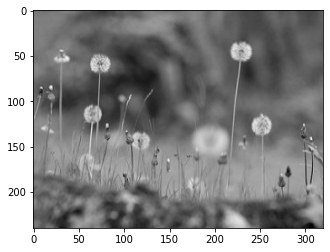

In [11]:
plt.imshow(X_test[0].reshape((240, 320)), cmap='gray')

In [68]:
np.random.seed(0)

In [69]:
def initialize_parameters(input_neuron, hidden_neuron, output_neuron):
  cache = {}
  # W1 = np.zeros((input_neuron, hidden_neuron)) + 0.5
  W1 = np.random.randn(input_neuron, hidden_neuron) * 0.001
  b1 = np.zeros((hidden_neuron, )) + 0.5
  W2 = np.random.randn(hidden_neuron, output_neuron) * 0.001
  b2 = np.zeros((output_neuron, )) + 0.5

  cache["W1"] = W1
  cache["b1"] = b1
  cache["W2"] = W2
  cache["b2"] = b2

  return cache

In [70]:
def forward_propagation(cache, X, predict=False):
  f1 = np.dot(cache["W1"].T, X) + cache["b1"]
  g1 = sigmoid(f1)

  f2 = np.dot(cache["W2"].T, g1) + cache["b2"]
  g2 = sigmoid(f2)

  if predict==False:
    cache["f1"] = f1
    cache["g1"] = g1
    cache["f2"] = f2
    cache["g2"] = g2
    return cache
  else:
    return g2

In [71]:
# def crossentropy(y, g):
#   entropy = 0
#   n = g.shape[0]

#   for row in range(n):
#       if y[row] == 1:
#         entropy += y[row] * (np.log2(g[row]))
#       else:
#         entropy += (1 - y[row]) * (np.log2((1-g[row])))
#   crossentropy = -1/n * entropy
#   return crossentropy

In [72]:
def squared_error(y, g):
  sum = np.mean((y - g)**2)
  return sum

In [73]:
def relu(h):
  return np.maximum(0, h)

In [74]:
# def softmax(h):
#   h /= 1000
#   soft = np.exp(h) / np.sum(np.exp(h))
#   soft[np.isnan(soft)] = 0
#   return soft

In [75]:
def one_hot_encoding(g):
  y = np.zeros(g.size)
  y[np.argmax(g)] = 1
  return y

In [76]:
def reverse_squared_error(y, g):
  reverse = 2 ** np.sum(y - g)
  return reverse

In [77]:
def sigmoid(g):
  return 1 / (1 + np.exp(-g))

In [78]:
# def reverse_softmax(f2):
#   f2 /= 1000
#   d = []
#   for i in range(len(f2)):
#     derivative = np.exp(f2[i]) * np.sum([np.exp(f2[j]) for j in range(len(f2)) if j != i])
#     d.append(derivative)
#   d = np.array(d)
#   d[np.isinf(d)] = 1
#   d[np.isnan(d)] = 0
#   return d

In [79]:
def reverse_sigmoid(f):
  return sigmoid(f) * (1-sigmoid(f))

In [80]:
def reverse_relu(f1):
  # Reverse relu
  d1 = np.where(f1 > 0, 1, 0)
  return d1

In [81]:
def backward_propagation(cache, X, y):
  dW2 = np.zeros(cache["W2"].shape)
  db2 = np.zeros(cache["b2"].shape)

  dEOout = reverse_squared_error(y, cache["g2"])

  d = reverse_sigmoid(cache["f2"])
  dW2 += dEOout * d * cache["f2"]
  db2 += dEOout * d

  dW1 = np.zeros(cache["W1"].shape)
  db1 = np.zeros(cache["b1"].shape)

  d1 = reverse_relu(cache["f1"])
  dEHidden = np.sum(dEOout * d * cache["W2"], axis=1)
  dW1 += dEHidden * d1 * X.reshape(-1, 1)
  db1 += dEHidden * d1

  cache["dW1"] = dW1
  cache["db1"] = db1
  cache["dW2"] = dW2
  cache["db2"] = db2
  return cache

In [82]:
# def backward_propagation(cache, X, y, eps=1e-3):
#   dW2 = np.zeros(cache["W2"].shape)
#   db2 = np.zeros(cache["b2"].shape)

#   dEOout = -1 * y * (1/(cache["g2"]+eps)) + (1-y)*(1/(1-(cache["g2"])+eps))
#   d = reverse_softmax(cache["f2"])
#   dW2 += dEOout * d * cache["f2"]
#   db2 += dEOout * d

#   dW1 = np.zeros(cache["W1"].shape)
#   db1 = np.zeros(cache["b1"].shape)

#   d1 = reverse_relu(cache["f1"])
#   dEHidden = np.sum(dEOout * d * cache["W2"], axis=1)

#   dW1 += dEHidden * d1 * X.reshape(-1, 1)
#   db1 += dEHidden * d1

#   cache["dW1"] = dW1
#   cache["db1"] = db1
#   cache["dW2"] = dW2
#   cache["db2"] = db2
#   return cache

In [83]:
def update_weights(cache, learning_rate):
  cache["W1"] = cache["W1"] - learning_rate * cache["dW1"]
  cache["b1"] = cache["b1"] - learning_rate * cache["db1"]
  cache["W2"] = cache["W2"] - learning_rate * cache["dW2"]
  cache["b2"] = cache["b2"] - learning_rate * cache["db2"]
  return cache

In [84]:
def accuracy(y, y_pred):
  return (y == y_pred).all()

In [85]:
# np.seterr(divide='ignore', invalid='ignore')

def train(input_neuron, hidden_neuron, output_neuron, X_train, y_train, learning_rate=0.03, epochs=10):
  cache = initialize_parameters(input_neuron, hidden_neuron, output_neuron)
  acc_per_epoch = []
  cost_per_epoch = []
  for epoch in range(epochs):
    cost_total = []
    acc_total = []

    print("Running epoch", str(epoch + 1))

    for i in range(0, len(X_train)):
      cache = forward_propagation(cache, X_train[i])
      cost = squared_error(y_train[i], cache["g2"])
      cache = backward_propagation(cache, X_train[i], y_train[i])
      cache = update_weights(cache, learning_rate)

      acc = accuracy(y_train[i], one_hot_encoding(cache["g2"]))

      acc_total.append(acc)
      cost_total.append(cost)

    acc_total = np.mean(acc_total)
    cost_total = np.mean(cost_total)
    acc_per_epoch.append(acc_total)
    cost_per_epoch.append(cost_total)

  cache["acc_per_epoch"] = acc_per_epoch
  cache["cost_per_epoch"] = cost_per_epoch
  
  return cache

cache = train(X_train.shape[1], 200, 3, X_train, y_train, epochs=10)

Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4
Running epoch 5
Running epoch 6
Running epoch 7
Running epoch 8
Running epoch 9
Running epoch 10


In [ ]:
cache

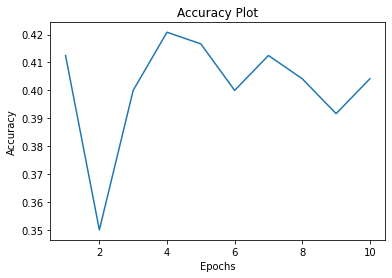

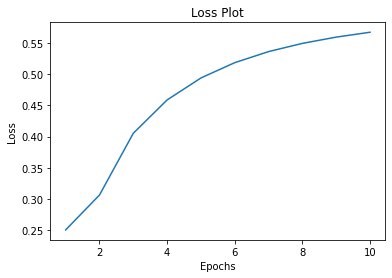

In [88]:
import matplotlib.pyplot as plt
plt.title('Accuracy Plot')
plt.plot(np.arange(len(cache["acc_per_epoch"]))+1, cache["acc_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Loss Plot')
plt.plot(np.arange(len(cache["cost_per_epoch"]))+1, cache["cost_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [89]:
def predict(cache, X_test):
  prediction = []
  for X in X_test:
    y = forward_propagation(cache, X, predict=True)
    y_pred = one_hot_encoding(y)
    prediction.append(y_pred)
  return np.array(prediction)

In [90]:
prediction = predict(cache, X_test)

In [91]:
count = []
for y in range(len(prediction)):
  count.append((prediction[y] == y_test[y]).all())
  # count.append(accuracy(prediction[y], y_test[y]))

np.mean(count)

0.36666666666666664

In [ ]:
prediction

In [93]:
cache = train(X_train.shape[1], 200, 3, X_train, y_train, learning_rate=0.8, epochs=50)

Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4
Running epoch 5
Running epoch 6
Running epoch 7
Running epoch 8
Running epoch 9
Running epoch 10
Running epoch 11
Running epoch 12
Running epoch 13
Running epoch 14
Running epoch 15
Running epoch 16
Running epoch 17
Running epoch 18
Running epoch 19
Running epoch 20
Running epoch 21
Running epoch 22
Running epoch 23
Running epoch 24
Running epoch 25
Running epoch 26
Running epoch 27
Running epoch 28
Running epoch 29
Running epoch 30
Running epoch 31
Running epoch 32
Running epoch 33
Running epoch 34
Running epoch 35
Running epoch 36
Running epoch 37
Running epoch 38
Running epoch 39
Running epoch 40
Running epoch 41
Running epoch 42
Running epoch 43
Running epoch 44
Running epoch 45
Running epoch 46
Running epoch 47
Running epoch 48
Running epoch 49
Running epoch 50
